In [1]:
#15 Aug. 7, 2018        S&P 500: +0.28%


In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from kneed import DataGenerator, KneeLocator 

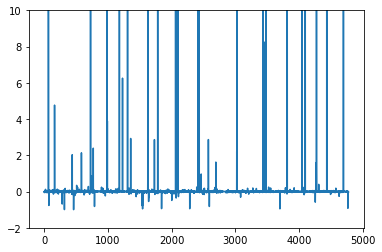

In [3]:
data = pd.read_csv("15.csv") 
price1=np.zeros(4779)
price2=np.zeros(4779)
price1=data['Price 08/06/2018'].values
price2=data['Price 08/07/2018'].values
pricechange=(price2-price1)/price1
pricechange.shape
x=np.arange(4779)
plt.plot(x,pricechange)
plt.ylim(-2,10)
plt.show()

67 25.349999999999994
728 22.333333333333336
989 21.35714285714286
1181 99.0
1309 35.19047619047619
1627 138.57142857142856
1782 23.365853658536587
2063 23.12
2091 27473.999999999996
2104 45.075949367088604
2416 11.407079646017701
2434 10.049250535331906
3026 329.4347826086957
3435 3225.6666666666665
3483 2095.0
3815 139.76923076923077
4048 180.48148148148147
4098 110.37037037037037
4275 695.4285714285716
4436 21.181818181818183
4698 2049.0


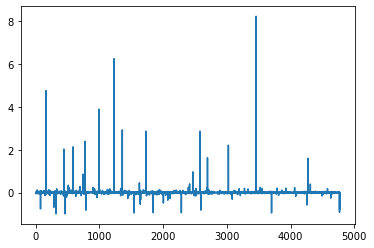

In [4]:
for i in range(4779):
    if pricechange[i]>10:
        print(i,pricechange[i])
        pricechange[i]=0
plt.plot(x,pricechange)
#plt.ylim(-2,10)
plt.show()

In [5]:
cluster_distance=[]
clusters=[]
for k in range(10,50): #try to find the elbow point 
    price3index=np.zeros((4779,2))  #2*4779 table 
    center=(np.random.rand(k)-0.5)*0.1  #random choose centers 
    total=0
    for j in range(100):     #iteration
        for i in range(4779):
            distance=np.abs(pricechange[i]-center)  #distance between each center to each point
            price3index[i]=[np.argmin(distance),np.min(distance)]   #index and shortest distance
        count=np.zeros((k,2))
        for i in range(4779):
            count[int(price3index[i][0])][0]+=1  #how many stocks in each cluster 
            count[int(price3index[i][0])][1]+=pricechange[i]   #sum of distance in each cluster
            center=count[:,1]/(count[:,0]+1e-9)  #new centers

    for i in range(4779):
        total=total+price3index[i][1] #shortest total distance of each point to its center point
    print('Cluster Number:',k,'Total Distance:',total)
    cluster_distance.append(total)
    clusters.append(k)

Cluster Number: 10 Total Distance: 48.22455015510136
Cluster Number: 11 Total Distance: 44.93648953983125
Cluster Number: 12 Total Distance: 39.0537275411334
Cluster Number: 13 Total Distance: 36.42850985038232
Cluster Number: 14 Total Distance: 33.91022887696361
Cluster Number: 15 Total Distance: 30.718592692716545
Cluster Number: 16 Total Distance: 30.158304022869302
Cluster Number: 17 Total Distance: 27.903757308232457
Cluster Number: 18 Total Distance: 28.5038892543021
Cluster Number: 19 Total Distance: 25.786328319673355
Cluster Number: 20 Total Distance: 24.221058311081222
Cluster Number: 21 Total Distance: 22.949297550626493
Cluster Number: 22 Total Distance: 22.469453828048735
Cluster Number: 23 Total Distance: 21.917782281833503
Cluster Number: 24 Total Distance: 20.289224131840786
Cluster Number: 25 Total Distance: 20.383367960140507
Cluster Number: 26 Total Distance: 19.5733756915475
Cluster Number: 27 Total Distance: 19.34091903790088
Cluster Number: 28 Total Distance: 19.1

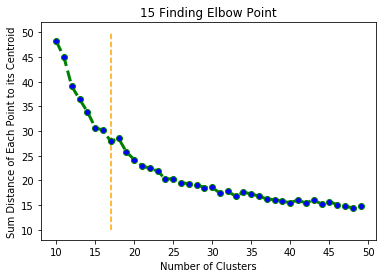

In [7]:
fig=plt.figure()

x=clusters
y=cluster_distance

kn=KneeLocator(x, y, curve='convex', direction='decreasing')


plt.plot(x, y,color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=6)

plt.vlines(kn.knee,10, 50,linestyles='dashed',color='orange')

# naming the x axis 
plt.xlabel('Number of Clusters') 
# naming the y axis 
plt.ylabel('Sum Distance of Each Point to its Centroid') 
  
# giving a title to my graph 
plt.title('15 Finding Elbow Point') 
  
# function to show the plot 
plt.show()

In [8]:
kn.knee

17

In [9]:
fig.savefig('15 Aug7 2018.png')